In [23]:
import os
path = os.path.abspath(os.getcwd())

In [24]:
import math
import numpy as np
import pandas as pd

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [25]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.style.use('ggplot')

In [26]:
pd.set_option("display.max_colwidth",100)

# I - Data formatting

In [27]:
data_files = ["model"+str(i) for i in range(1,5)]

In [28]:
def import_csv(filename): 
    data_path = os.path.join(path, "data", filename + ".csv")
    data = pd.read_csv(data_path)
    data["time"] = data["time"].str.replace("s", "")
    data["function"] = data["function"].str.replace("T", "T_")
        
    return data

In [29]:
filename = data_files[0]
data = import_csv(filename)
data

,time,bit_size,delta_scale,delta_location,function,round,entropy,min_entropy,kl_divergence,statistical_distance
0,68.56,32,48125,3804,data_distrib,0,1.179886,0.451287,3.081705e+01,5.019531e-01
1,3150.85,32,48125,3804,T_1,1,3.248303,1.408103,1.267245e+01,4.907403e-01
2,3240.85,32,48125,3804,T_4,4,6.521856,4.534715,9.081230e+00,4.665142e-01
3,3251.64,32,48125,3804,T_2,2,4.793225,2.849438,1.099903e+01,4.825760e-01
4,3963.21,32,48125,3804,T_5,5,7.105519,5.113052,8.438016e+00,4.575706e-01
...,...,...,...,...,...,...,...,...,...,...
194,80492.38,32,48125,3804,rot_16,6,15.999999,16.000000,0.000000e+00,4.656613e-10
195,81164.15,32,48125,3804,rot_12,3,16.000000,15.999995,-4.768372e-07,2.384186e-07
196,82170.15,32,48125,3804,rot_12,4,15.999999,16.000000,0.000000e+00,4.656613e-10
197,83174.39,32,48125,3804,rot_12,5,15.999999,16.000000,0.000000e+00,4.656613e-10


In [30]:
data.columns

Index(['time', 'bit_size', 'delta_scale', 'delta_location', 'function',
       'round', 'entropy', 'min_entropy', 'kl_divergence',
       'statistical_distance'],
      dtype='object')

# II - Data plotting

In [31]:
def get_pivot_table(filename, metric, functions=None):
    data = import_csv(filename)
    data["function"] = data["function"].str.replace("rot_", "")
    filtered_data = data[data['function'].str.match('[0-9]+')]
    pivot_table = filtered_data.pivot_table(index='round', columns='function', values=metric)
    
    if functions != None:
        pivot_table = pivot_table[functions]
        
    return pivot_table

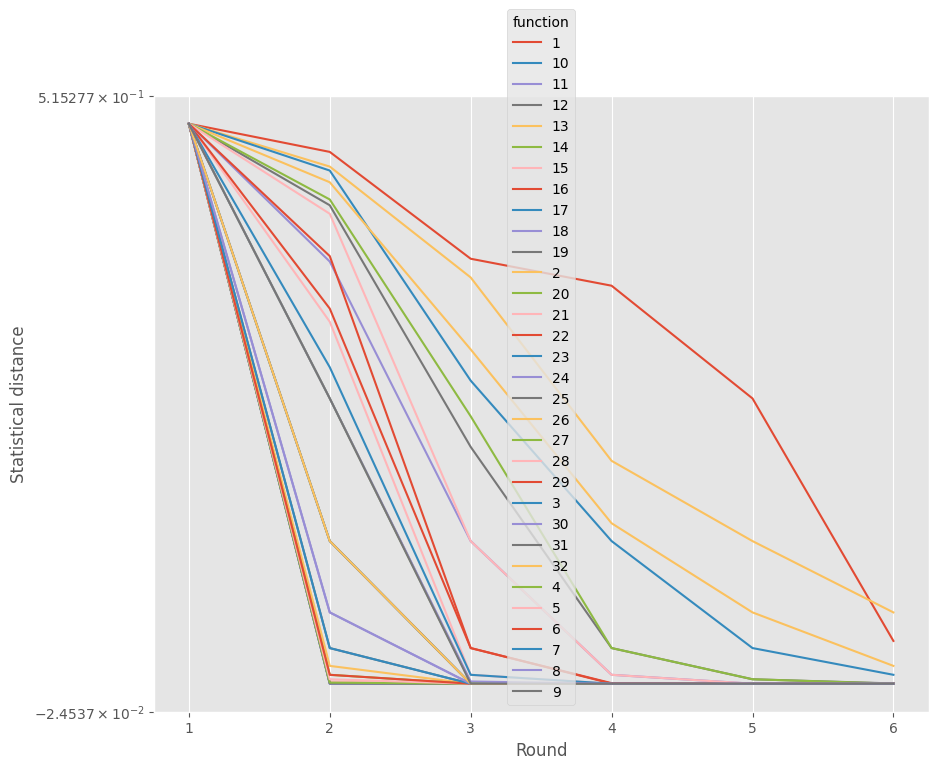

In [32]:
# Plot the pivot table
filename = data_files[0]
pivot_table = get_pivot_table(filename, 'statistical_distance', None)
ax = pivot_table.plot(xticks=pivot_table.index, xlabel="Round", ylabel='Statistical distance')
ax.set_yscale('symlog')

In [33]:
dataframes = []
for filename in data_files:
    data = import_csv(filename)
    data["function"] = data["function"].str.replace("rot_", "")
    filtered_data = data[data['function'].str.match('[0-9]+')]
    dataframes.append(filtered_data)
    
combined_df = pd.concat(dataframes)
mean_pivot_table = combined_df.pivot_table(index='round', columns='function', values='statistical_distance', aggfunc='mean')

# Print the mean pivot table
mean_pivot_table

function,1,10,11,12,13,14,15,16,17,18,...,3,30,31,32,4,5,6,7,8,9
round,,,,,,,,,,,,,,,,,,,,,
1,0.484427,4.844273e-01,4.844273e-01,4.844273e-01,4.844273e-01,4.844273e-01,4.844273e-01,4.844273e-01,4.844273e-01,4.844273e-01,...,4.844273e-01,4.844273e-01,4.844273e-01,0.484427,4.844273e-01,4.844273e-01,4.844273e-01,4.844273e-01,4.844273e-01,4.844273e-01
2,0.428821,8.203125e-02,4.003906e-02,2.001953e-02,9.887695e-03,4.890442e-03,1.220733e-03,2.746731e-04,3.245473e-05,4.082918e-06,...,3.978882e-01,3.344197e-01,3.737735e-01,0.399193,3.848541e-01,3.657503e-01,3.062593e-01,2.215495e-01,2.031250e-01,1.542969e-01
3,0.320028,3.259757e-09,1.210719e-08,1.051988e-07,2.980232e-07,3.352761e-08,1.513801e-09,4.386038e-10,4.085824e-09,8.116858e-11,...,2.304688e-01,8.007812e-02,1.576260e-01,0.244001,1.757812e-01,8.007812e-02,2.441406e-02,5.920410e-03,1.098648e-03,3.147125e-05
4,0.277493,6.111805e-10,3.728929e-10,3.783498e-10,2.910383e-10,6.111805e-10,2.910383e-10,2.037268e-10,8.731147e-11,2.328306e-10,...,8.984375e-02,4.898071e-03,2.392578e-02,0.113281,2.050781e-02,4.898071e-03,2.746582e-04,6.118501e-10,2.055458e-10,6.306524e-10
5,0.187500,4.656613e-10,5.238690e-10,3.201421e-10,3.492460e-10,3.783498e-10,4.656613e-10,2.910383e-10,2.910383e-10,3.492460e-10,...,2.001953e-02,1.192099e-05,2.456665e-03,0.040039,2.456665e-03,3.934023e-06,6.738304e-10,6.402843e-10,3.492460e-10,5.820766e-10
6,0.173437,4.074536e-10,3.783498e-10,3.783498e-10,3.783498e-10,6.111805e-10,4.074536e-10,3.783498e-10,3.201421e-10,3.783498e-10,...,4.943848e-03,2.328306e-10,1.373291e-04,0.010010,3.242504e-05,9.604264e-10,6.402843e-10,4.365575e-10,3.783498e-10,2.910383e-10
7,0.031250,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10,...,9.536743e-07,4.656613e-10,2.328306e-10,0.000122,4.656613e-10,2.328306e-10,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10
8,0.015625,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10,...,0.000000e+00,4.656613e-10,4.656613e-10,0.000002,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10


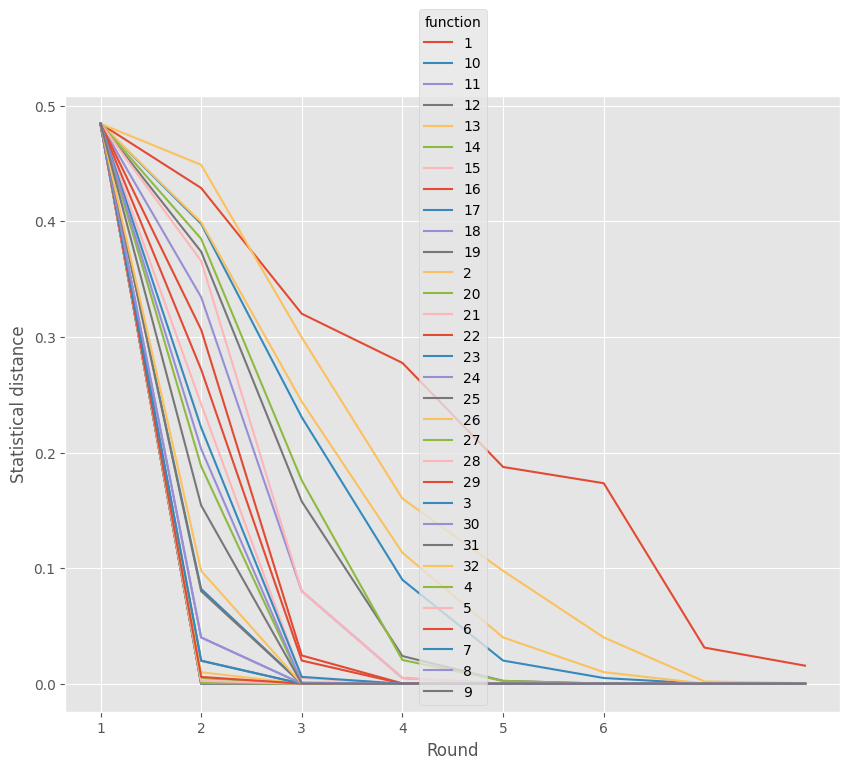

In [34]:
ax = mean_pivot_table.plot(xticks=pivot_table.index, xlabel="Round", ylabel='Statistical distance', logy=False)

In [35]:
mean_pivot_table[mean_pivot_table.index == 2]

function,1,10,11,12,13,14,15,16,17,18,...,3,30,31,32,4,5,6,7,8,9
round,,,,,,,,,,,,,,,,,,,,,
2,0.428821,0.082031,0.040039,0.02002,0.009888,0.00489,0.001221,0.000275,0.000032,0.000004,...,0.397888,0.33442,0.373774,0.399193,0.384854,0.36575,0.306259,0.221549,0.203125,0.154297


In [36]:
def find_function_with_lowest_value(pivot_table, round_value):
    """
    Given a pivot table and a round value, return the function number with the lowest associated value.
    
    Args:
    pivot_table (pd.DataFrame): The pivot table.
    round_value (int): The round value.

    Returns:
    str: The function number with the lowest associated value.
    """
    # Extract the row corresponding to the round value
    round_row = pivot_table.loc[round_value]

    # Find the function with the minimum value
    min_function = round_row.idxmin()

    return min_function

round_value = 2
function_with_lowest_value = find_function_with_lowest_value(mean_pivot_table, round_value)
print("The function with the lowest value for round", round_value, "is", function_with_lowest_value)

The function with the lowest value for round 2 is 18


In [37]:
mean_pivot_table[mean_pivot_table.index == 2]

function,1,10,11,12,13,14,15,16,17,18,...,3,30,31,32,4,5,6,7,8,9
round,,,,,,,,,,,,,,,,,,,,,
2,0.428821,0.082031,0.040039,0.02002,0.009888,0.00489,0.001221,0.000275,0.000032,0.000004,...,0.397888,0.33442,0.373774,0.399193,0.384854,0.36575,0.306259,0.221549,0.203125,0.154297
